In [1]:
import numpy as np
import pandas as pd
import sesd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
data = pd.read_csv("Dataset/response_times.csv")

In [3]:
data.head()

,ts,av
0,2018-09-30T23:57:00,429.821962
1,2018-09-30T23:56:00,487.187884
2,2018-09-30T23:55:00,371.076108
3,2018-09-30T23:54:00,391.912343
4,2018-09-30T23:53:00,374.809720


In [4]:
data.describe()

,av
count,16933.000000
mean,885.474910
std,1062.299734
min,6.081152
25%,326.586425
50%,399.414030
75%,929.104446
max,8393.277899


In [5]:
df = data['av']

In [6]:
outliers_indices = sesd.seasonal_esd(df,seasonality = 25, hybrid=True, max_anomalies=2500, alpha = 3)

In [7]:
print('Non-outlier observations: %d' % len(outliers_indices))

Non-outlier observations: 2500


In [8]:
outliers = []
sorted_outliers_indices = np.sort(outliers_indices)
test_outliers_indices = sorted_outliers_indices[:300]
for idx in test_outliers_indices:
    outliers.append(df[idx])

In [9]:
marks = []
for i in df[:300]:
    if i in outliers:
        marks.append(i)
    else:
        marks.append(np.NAN)

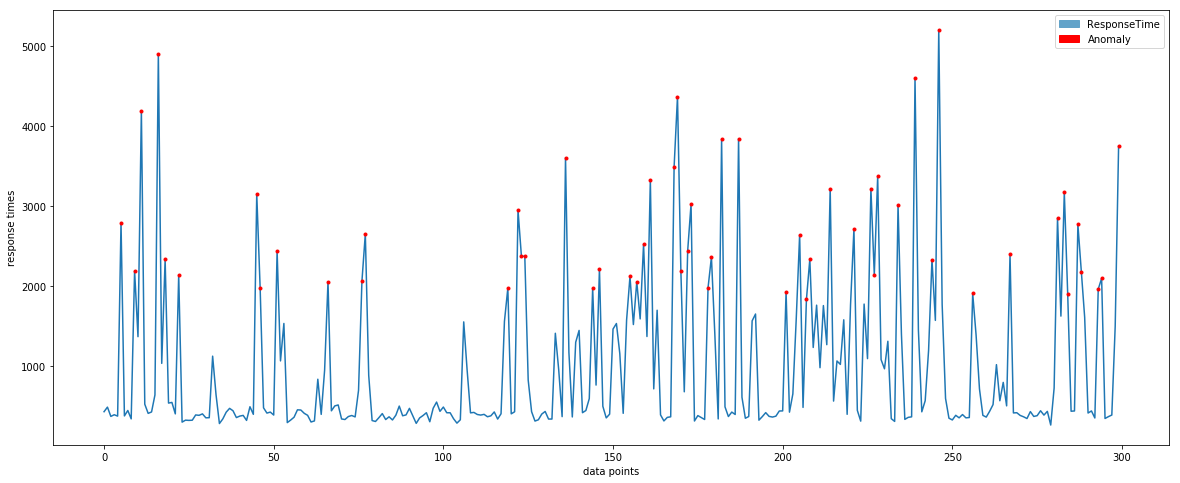

In [10]:
plt.figure(figsize = (20,8))
plt.plot(df[:300], linestyle = '-', label ='ResponseTime')
plt.plot(marks, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('response times')
plt.xlabel('data points')
plt.show()

Average Value of Outliers : 3099.80

Max Value in Detected Outliers : 6564.99

Min Value in Detected Outliers : 1773.52